<a href="https://colab.research.google.com/github/bushranajeeb/Image_processing_filters/blob/main/laplacian_operator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

In [ ]:
#defining functions for plotting figures
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

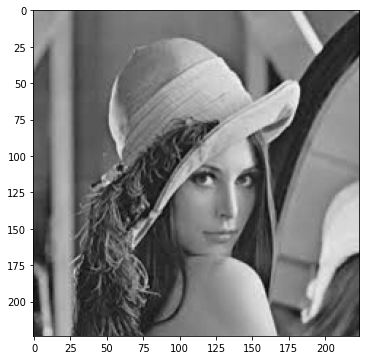

In [ ]:
#Loading our input image
img_path = 'Lena-Gray-3.png'
img = Image.open(img_path)
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)

In [ ]:
#Calculating gaussian blur, this is rough part please remove it. I left it so you can see how I got gaussian blur
a= np.array([[1,4,7,4,1],
           [4,16,26,16,4],
           [7,26,41,26,7], 
           [4,16,26,16,4], 
           [1,4,7,4,1]])
b = (1/273)

np.multiply(a,b)

array([[0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.02564103, 0.0952381 , 0.15018315, 0.0952381 , 0.02564103],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ]])

In [ ]:
#Declaring gaussian filter and laplacian operator kernel for convolution

gaussian_blur = np.array([[0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.02564103, 0.0952381 , 0.15018315, 0.0952381 , 0.02564103],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ]])


laplacian = np.array([
                      [-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]
])

In [ ]:
#declare a function to calculate the image size after applying the convolution
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

In [ ]:
calculate_target_size(img_size=224, kernel_size=5)

220

In [ ]:
#Declaring a convolution function
def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

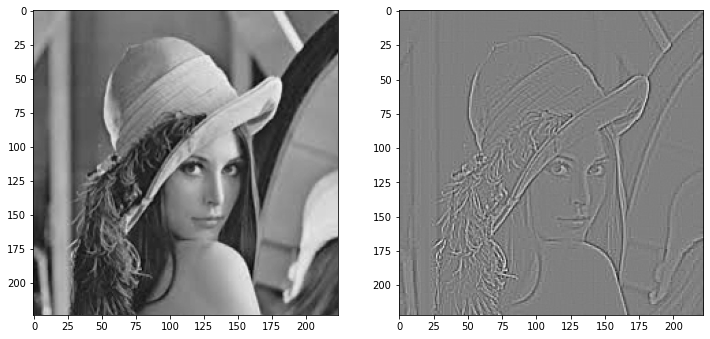

In [ ]:
#Applying laplacian operator directly without gaussian blurring
img_laplacian = convolve(img=np.array(img), kernel=laplacian)
plot_two_images(
    img1=img, 
    img2=img_laplacian
)

In [ ]:
# #Applying gaussian smoothing filter using opencv library
# im = cv2.imread(img_path)
# img_blurred = cv2.GaussianBlur(im,(5,5),0)
# plot_two_images(
#     img1=img, 
#     img2=img_blurred
# )

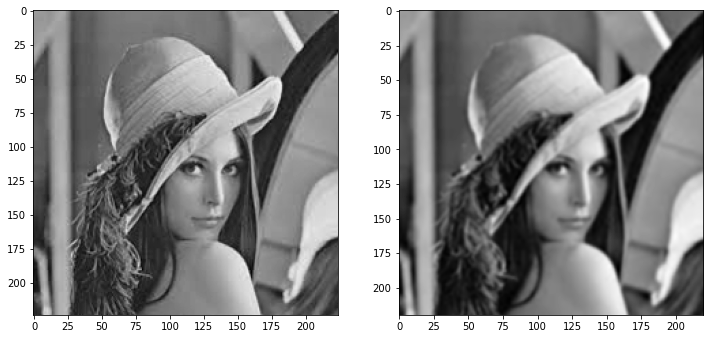

In [ ]:
#Applying gaussian blurring on the image
img_blurred = convolve(img=np.array(img), kernel=gaussian_blur)
plot_two_images(
    img1=img, 
    img2=img_blurred
)

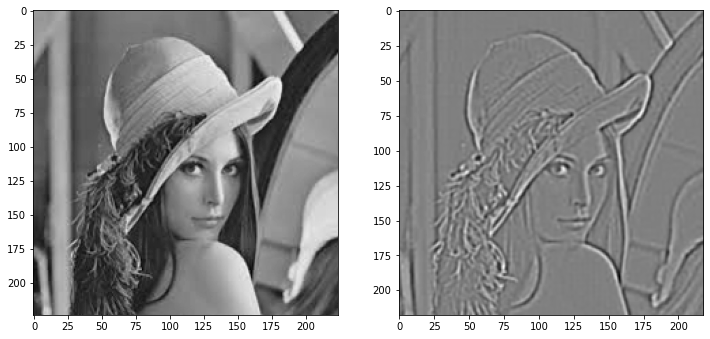

In [ ]:
#Applying laplacian operator on blurred image
img_laplacian = convolve(img=np.array(img_blurred), kernel=laplacian)
plot_two_images(
    img1=img, 
    img2=img_laplacian
)